<a href="https://colab.research.google.com/github/yudits10/SMMPart2/blob/main/SMMPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# library import
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')
tweets_en_biden = pd.read_csv('./drive/MyDrive/tweets_en_biden.csv', lineterminator='\n', parse_dates = True)
tweets_en_trump = pd.read_csv('./drive/MyDrive/tweets_en_trump.csv', lineterminator='\n', parse_dates = True)

Mounted at /content/drive


In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
def remove_punct (text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

tweets_en_biden['text_clean'] = tweets_en_biden['tweet'].apply(lambda x: remove_punct(x))
tweets_en_trump['text_clean'] = tweets_en_trump['tweet'].apply(lambda x: remove_punct(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,city,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,NaN,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,Los Angeles,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...


In [6]:
import re
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

tweets_en_biden['text_tokenized'] = tweets_en_biden['text_clean'].apply(lambda x: tokenize(x.lower()))
tweets_en_trump['text_tokenized'] = tweets_en_trump['text_clean'].apply(lambda x: tokenize(x.lower()))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,country,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ..."
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,United States of America,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,United States of America,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,United States of America,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins..."


In [7]:
def short_long(text):
  text = [word for word in text if (len(word)>2 and len(word)<12)]
  return text


tweets_en_biden['no_long_short'] = tweets_en_biden['text_tokenized'].apply(lambda x: short_long(x))
tweets_en_trump['no_long_short'] = tweets_en_trump['text_tokenized'].apply(lambda x: short_long(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,continent,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,North America,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,North America,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,North America,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,North America,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,North America,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult..."


In [8]:
# remove string with 'http'
def remove_http(text):
  text = [word for word in text if not word.startswith('http')]
  return text


tweets_en_biden['no_http'] = tweets_en_biden['no_long_short'].apply(lambda x: remove_http(x))
tweets_en_trump['no_http'] = tweets_en_trump['no_long_short'].apply(lambda x: remove_http(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,Montana,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,California,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,Illinois,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,California,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult..."


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords (tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

tweets_en_biden['text_nostop'] = tweets_en_biden['no_http'].apply(lambda x: remove_stopwords(x))
tweets_en_trump['text_nostop'] = tweets_en_trump['no_http'].apply(lambda x: remove_stopwords(x))

tweets_en_biden.head()

,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,state_code,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,MT,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,CA,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,IL,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,CA,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,NaN,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b..."


In [11]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizing (text):
    text = [wn.lemmatize(word) for word in text]
    return text

tweets_en_biden['text_lemmatized'] = tweets_en_biden['text_nostop'].apply(lambda x: lemmatizing(x))
tweets_en_trump['text_lemmatized'] = tweets_en_trump['text_nostop'].apply(lambda x: lemmatizing(x))

tweets_en_biden.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Unnamed: 0,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,...,collected_at,created_at_r,created_at_r2,lang,text_clean,text_tokenized,no_long_short,no_http,text_nostop,text_lemmatized
0,2,2020-10-15 00:00:20.000000000,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,...,2020-10-21 00:00:01.035654566,2020-10-15 00,10-15,en,IslandGirlPRV BradBeauregardJ MeidasTouch This...,"[islandgirlprv, bradbeauregardj, meidastouch, ...","[meidastouch, this, how, biden, made, his]","[meidastouch, this, how, biden, made, his]","[meidastouch, biden, made]","[meidastouch, biden, made]"
1,4,2020-10-15 00:00:22.000000000,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,...,2020-10-21 00:00:02.071309132,2020-10-15 00,10-15,en,censorship HunterBiden Biden BidenEmails Biden...,"[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ...","[censorship, hunterbiden, biden, bidenemails, ..."
2,21,2020-10-15 00:01:42.000000000,1.316530e+18,In an effort to find the truth about allegatio...,1.0,0.0,Twitter Web App,1.165118e+18,The Big Homie,_dbrown_23,...,2020-10-21 00:00:10.874372943,2020-10-15 00,10-15,en,In an effort to find the truth about allegatio...,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, the, truth, about, allegations,...","[effort, find, the, truth, about, allegations,...","[effort, find, truth, allegations, twitter, is...","[effort, find, truth, allegation, twitter, isn..."
3,22,2020-10-15 00:01:47.000000000,1.316530e+18,Twitter is doing everything they can to help D...,1.0,0.0,Twitter for iPhone,1.139962e+18,Wynward,Joelwhct,...,2020-10-21 00:00:11.392200226,2020-10-15 00,10-15,en,Twitter is doing everything they can to help D...,"[twitter, is, doing, everything, they, can, to...","[twitter, doing, everything, they, can, help, ...","[twitter, doing, everything, they, can, help, ...","[twitter, everything, help, democrats, win, el...","[twitter, everything, help, democrat, win, ele..."
4,23,2020-10-15 00:01:50.000000000,1.316530e+18,#JoeBiden calls him a lier and then insults hi...,0.0,0.0,Twitter for iPhone,8.283593e+08,Andy 🇺🇸,VandyRick,...,2020-10-21 00:00:11.910027509,2020-10-15 00,10-15,en,JoeBiden calls him a lier and then insults him...,"[joebiden, calls, him, a, lier, and, then, ins...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, him, lier, and, then, insult...","[joebiden, calls, lier, insults, overweight, b...","[joebiden, call, lier, insult, overweight, bid..."


In [12]:
tweets_en_biden.to_csv('tweets_en_biden_lemm.csv')
tweets_en_trump.to_csv('tweets_en_trump_lemm.csv')

In [13]:
tweets_en_biden = pd.read_csv('tweets_en_biden_lemm.csv', lineterminator='\n', parse_dates=True)
tweets_en_trump = pd.read_csv('tweets_en_trump_lemm.csv', lineterminator='\n', parse_dates=True)

In [14]:
biden = tweets_en_biden.loc[tweets_en_biden['country'] == 'United States of America']['text_lemmatized']
trump = tweets_en_trump.loc[tweets_en_trump['country'] == 'United States of America']['text_lemmatized']

In [15]:
biden

0                          ['meidastouch', 'biden', 'made']
1         ['censorship', 'hunterbiden', 'biden', 'bidene...
2         ['effort', 'find', 'truth', 'allegation', 'twi...
3         ['twitter', 'everything', 'help', 'democrat', ...
4         ['joebiden', 'call', 'lier', 'insult', 'overwe...
                                ...                        
120257     ['biden', 'image', 'santa', 'maria', 'joebiden']
120258              ['become', 'ubiquitous', 'bidenharris']
120259                          ['moving', 'near', 'biden']
120260    ['flotus', 'excited', 'flotus', 'whose', 'vagi...
120261                  ['man', 'need', 'helpusa', 'biden']
Name: text_lemmatized, Length: 120262, dtype: object

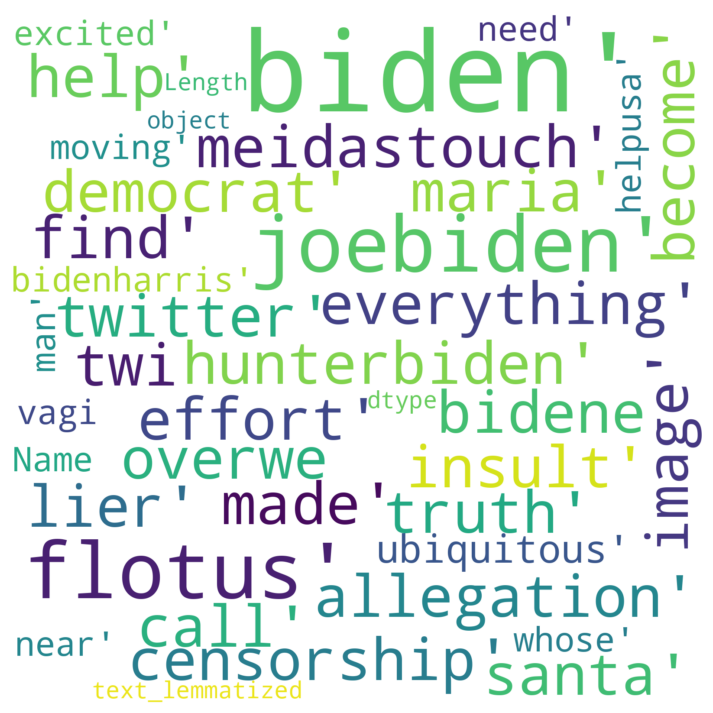

In [16]:
!pip install wordcloud
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS,
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(biden.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

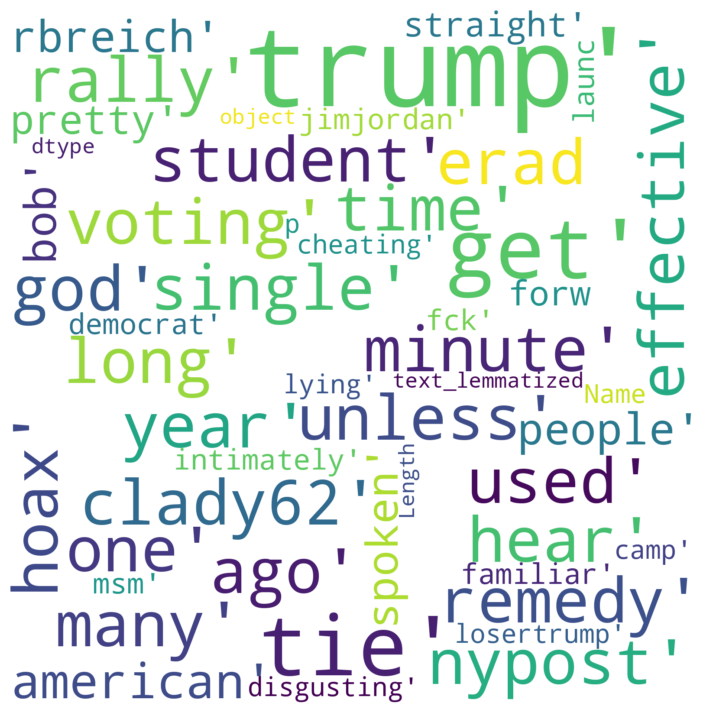

In [17]:
plt.subplots(1,1, figsize=(9,9))
wc_b = WordCloud(stopwords=STOPWORDS,
                 background_color="white", max_words=50,
                 max_font_size=256, random_state=42,
                 width=1600, height=1600)
wc_b.generate(str(trump.dropna()))
plt.imshow(wc_b, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
text_biden = tweets_en_biden['text_clean']
text_trump = tweets_en_trump['text_clean']

In [19]:
import unicodedata
def clean1(sent):
    filtered_sent=""
    stopwords = nltk.corpus.stopwords.words('english')
    sent = (unicodedata.normalize('NFKD', sent)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    sent = re.sub(r'#.+|https.+|[^(a-zA-Z)\s]','',sent)
    words=sent.split()
    for word in words:
        if word not in stopwords:
            filtered_sent=filtered_sent+' '+word
    return filtered_sent

def clean2(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text)
            .encode('ascii', 'ignore')
            .decode('utf-8', 'ignore')
            .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

words_biden = clean2(''.join(str(text_biden.apply(clean1).tolist())))
words_trump = clean2(''.join(str(text_trump.apply(clean1).tolist())))
words_biden[:10]

['islandgirlprv',
 'bradbeauregardj',
 'meidastouch',
 'biden',
 'made',
 'trumpisnotamerica',
 'censorship',
 'hunterbiden',
 'biden',
 'bidenemails']

NameError: name 'biden_ngrams' is not defined

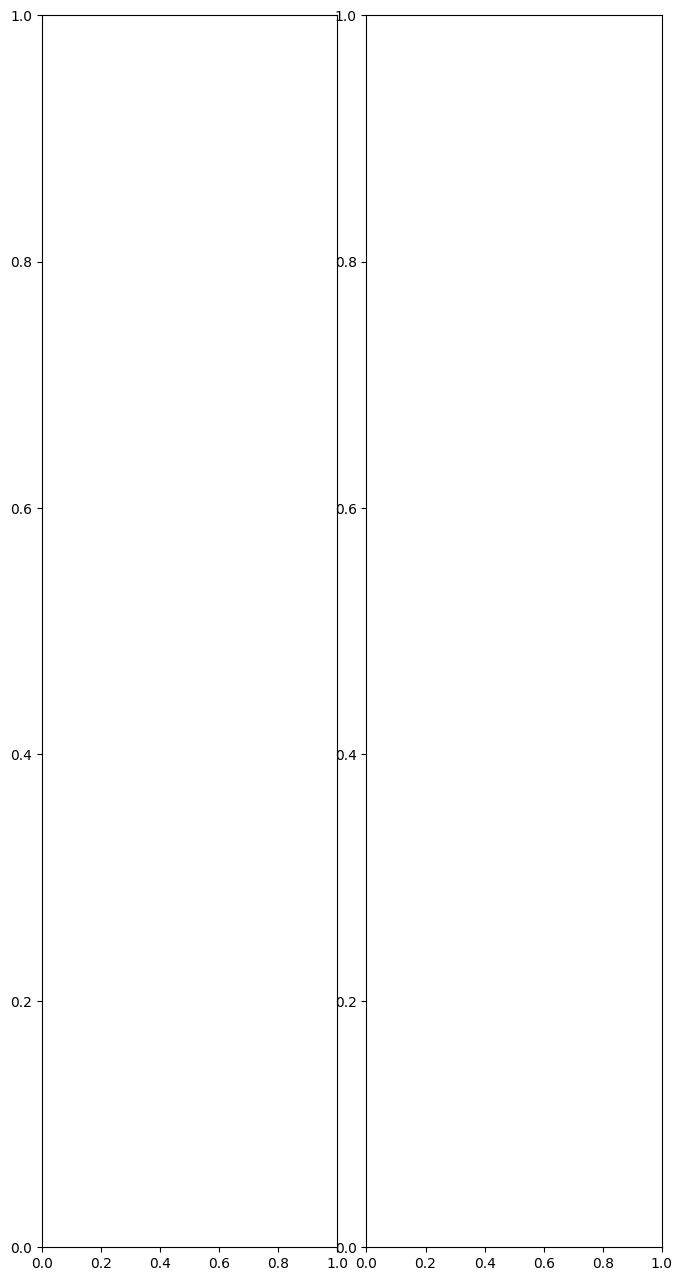

In [21]:
barcolors = ['olivedrap','mediumslateblue','lightpink','orange','lightcoral','palegreen','deepskyblue','Grey']
barstyle = {"edgecolor":"white", "linewidth":1}

fig, ax=plt.subplots(1,2, figsize=(8,16),
                     gridspec_kw={'width_ratios':[1,1], 'wspace':0.1, 'hspace':0.1})

barh_ax = ax[0]
biden_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[3],**barstyle)
barh_ax.yaxis.set_label_position("left")
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim()[::-1])
barh_ax.set_xlabel('Bi & Tri N-gram Count - Biden Dataset')
barh_ax.set_ylabel('')

barh_ax = ax[1]
trump_ngrams[::-1].plot.barh(ax=barh_ax, color=barcolors[6],**barstyle)
barh_ax.xaxis.tick_top()
barh_ax.xaxis.set_label_position("top")
#barh_ax.xaxis.set_major_formatter(formatterK2)
barh_ax.set_xlim([0, 3500])
barh_ax.set_xlim(barh_ax.get_xlim())
barh_ax.yaxis.tick_right()
barh_ax.set_xlabel('Bi & Tri N-gram Count - Trump Dataset')
barh_ax.set_ylabel('')
plt.show()

In [22]:
tweets_biden_blob = tweets_en_biden['text_clean'].to_frame()
tweets_trump_blob = tweets_en_trump['text_clean'].to_frame()

tweets_biden_blob.head()

,text_clean
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...
1,censorship HunterBiden Biden BidenEmails Biden...
2,In an effort to find the truth about allegatio...
3,Twitter is doing everything they can to help D...
4,JoeBiden calls him a lier and then insults him...


In [23]:
!pip install textblob
from textblob import TextBlob
tweets_biden_blob['polarity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_biden_blob['subjectivity'] = tweets_biden_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
biden_blob = tweets_biden_blob.sample(1000)

tweets_trump_blob['polarity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)
tweets_trump_blob['subjectivity'] = tweets_trump_blob['text_clean'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
trump_blob = tweets_trump_blob.sample(1000)

trump_blob.head()

,text_clean,polarity,subjectivity
104991,Are governor’s of NewYork amp NewJersey NYGovC...,0.000,0.000000
92361,GOP Presidential votes in the Lone Star State ...,0.000,0.000000
42211,DonaldTrump says that NYC is a ghost town amp ...,-0.075,0.616667
55664,this side up streetphotography donaldtrump str...,0.000,0.000000
24351,CBS12 trump is the “disaster “ will only liste...,0.000,1.000000


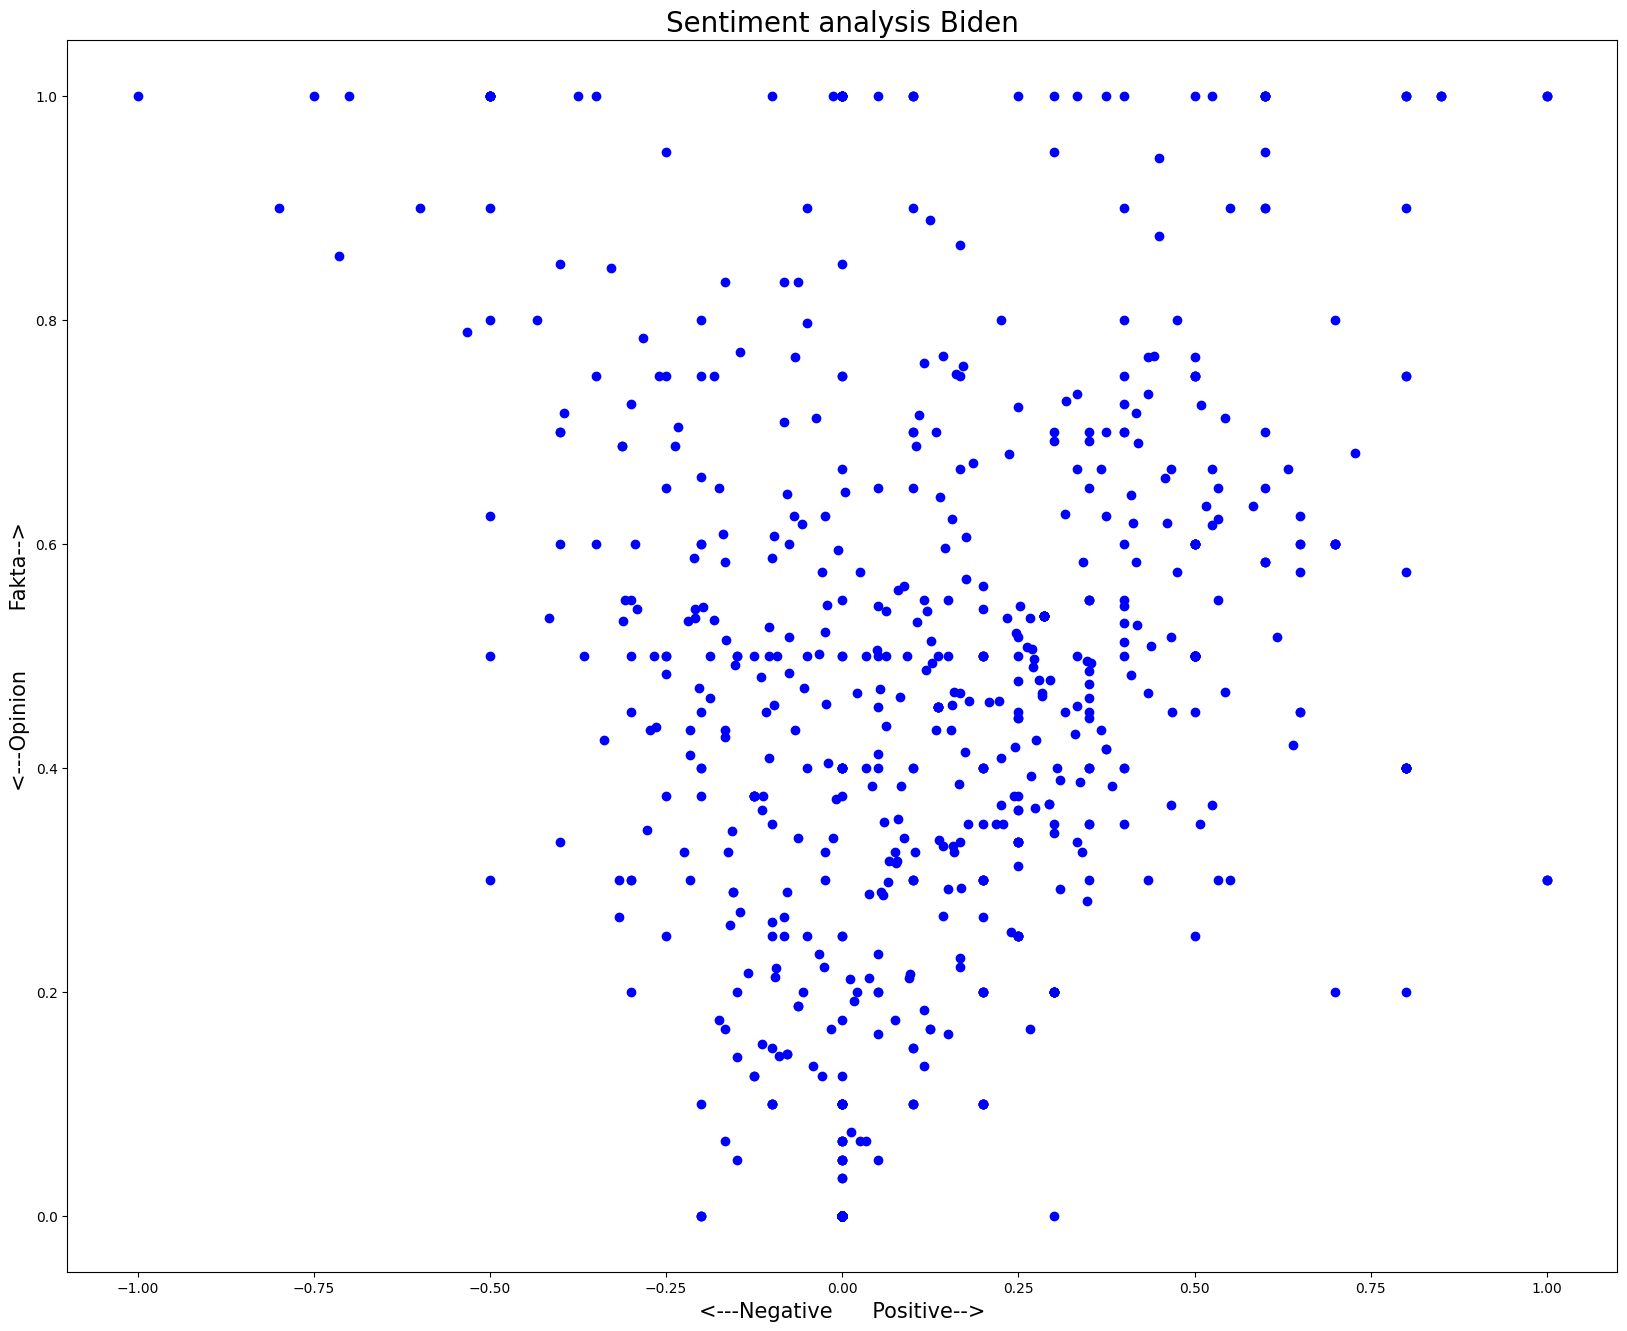

In [25]:
plt.figure(figsize=[20, 16])

for index, row in enumerate(biden_blob.index):
    x = biden_blob.polarity.loc[row]
    y = biden_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='blue')

plt.title('Sentiment analysis Biden', fontsize=20)
plt.xlabel('<---Negative      Positive-->', fontsize=15)
plt.ylabel('<---Opinion         Fakta-->', fontsize=15)

plt.show()

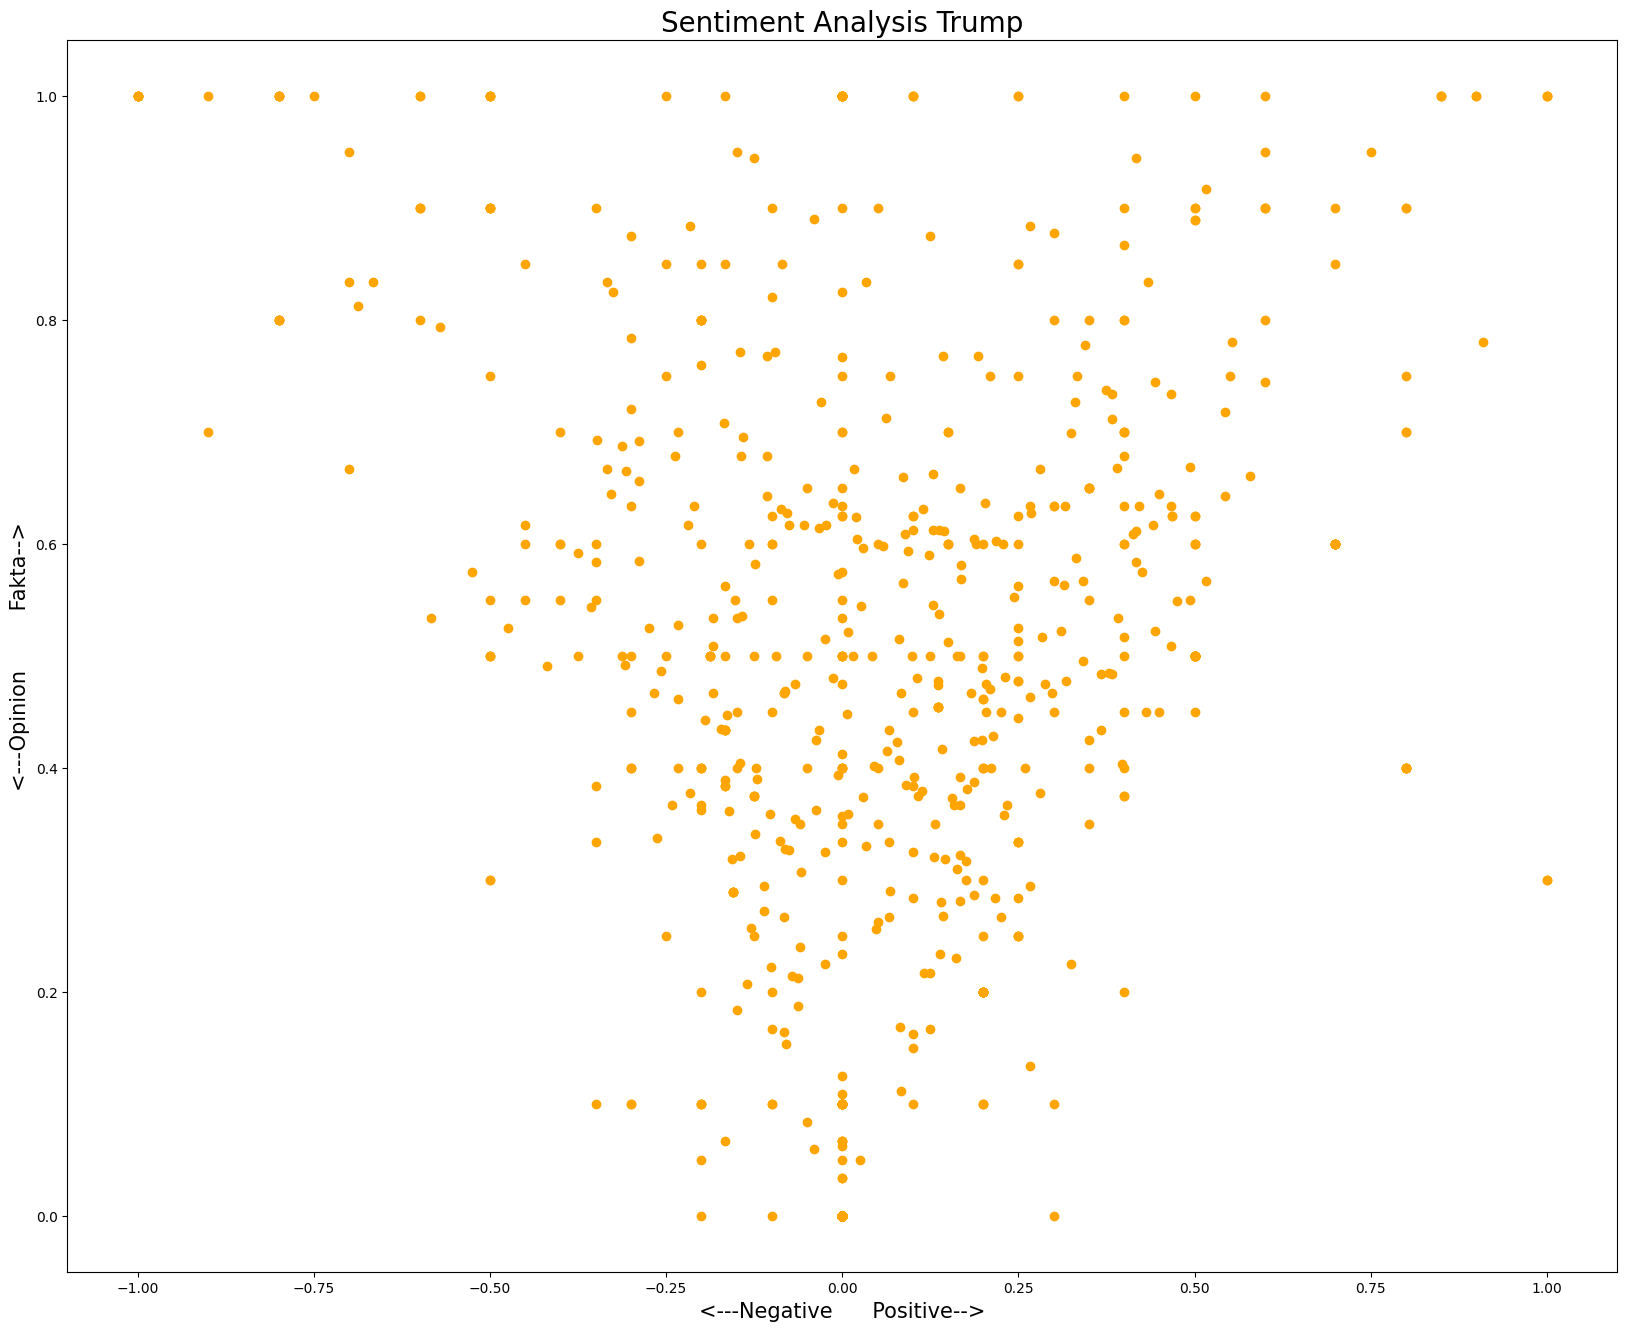

In [26]:
plt.figure(figsize=[20, 16])

for index, row in enumerate(trump_blob.index):
    x = trump_blob.polarity.loc[row]
    y = trump_blob.subjectivity.loc[row]
    plt.scatter(x, y, color='orange')

plt.title('Sentiment Analysis Trump', fontsize=20)
plt.xlabel('<---Negative      Positive-->', fontsize=15)
plt.ylabel('<---Opinion         Fakta-->', fontsize=15)

plt.show()

<Axes: title={'center': 'Boxplot subjectivitas Biden'}>

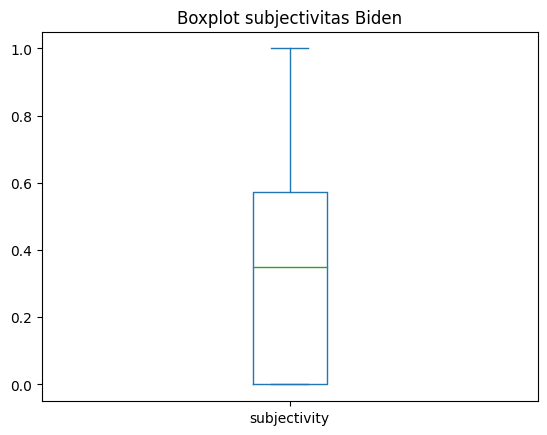

In [27]:
tweets_biden_blob.subjectivity.plot.box(title='Boxplot subjectivitas Biden')

<Axes: title={'center': 'Boxplot subjectivitas trump'}>

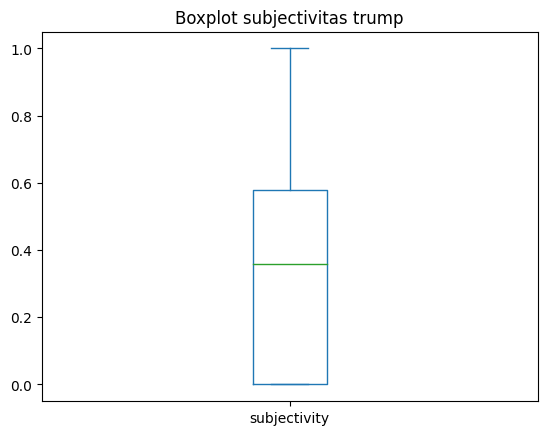

In [28]:
tweets_trump_blob.subjectivity.plot.box(title='Boxplot subjectivitas trump')

<Axes: title={'center': 'bOXPLOT Sentiment/Polarity Biden'}>

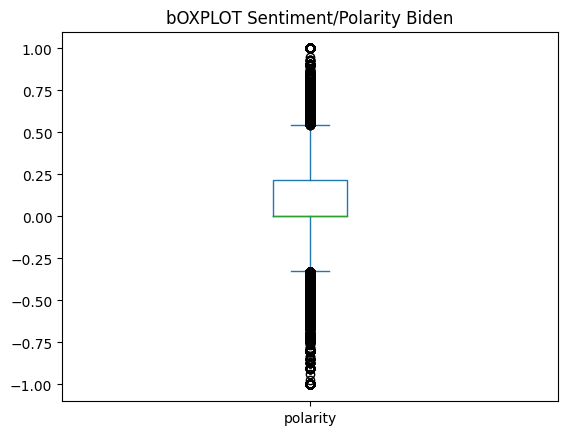

In [29]:
tweets_biden_blob.polarity.plot.box(title='bOXPLOT Sentiment/Polarity Biden')

<Axes: title={'center': 'Boxplot sentimet/polarity trump'}>

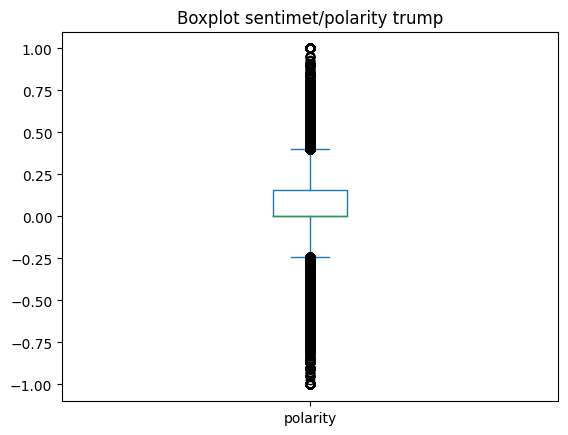

In [30]:
tweets_trump_blob.polarity.plot.box(title='Boxplot sentimet/polarity trump')

In [31]:
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

tweets_biden_blob['analysis'] = tweets_biden_blob['polarity'].apply(getAnalysis)
tweets_trump_blob['analysis'] = tweets_trump_blob['polarity'].apply(getAnalysis)
tweets_biden_blob.head()

,text_clean,polarity,subjectivity,analysis
0,IslandGirlPRV BradBeauregardJ MeidasTouch This...,0.00,0.000000,neutral
1,censorship HunterBiden Biden BidenEmails Biden...,0.00,0.000000,neutral
2,In an effort to find the truth about allegatio...,0.00,0.000000,neutral
3,Twitter is doing everything they can to help D...,0.14,0.617778,positive
4,JoeBiden calls him a lier and then insults him...,0.00,0.150000,neutral


Text(0.5, 1.0, 'The distribution of sentiment in tweets about Biden')

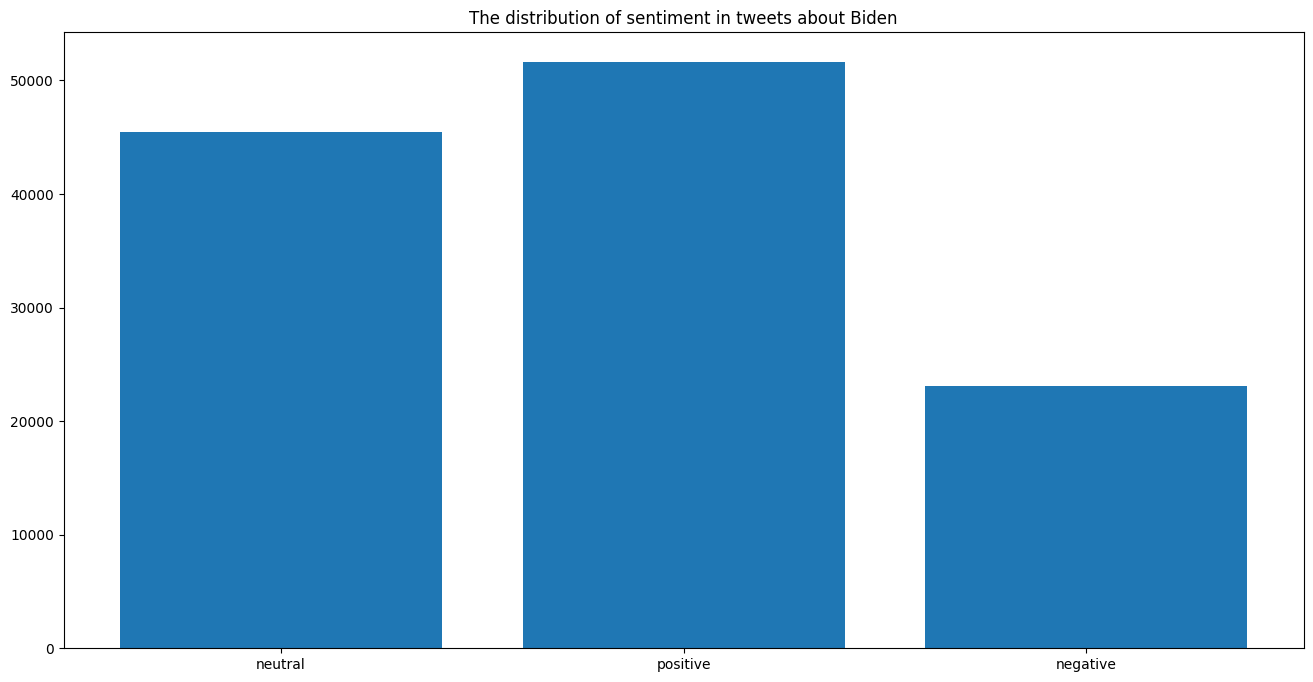

In [32]:
from collections import Counter

target_biden = Counter(tweets_biden_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_biden.keys(), target_biden.values())
plt.title("The distribution of sentiment in tweets about Biden")

Text(0.5, 1.0, 'The distribution of sentiment in tweets about Trump')

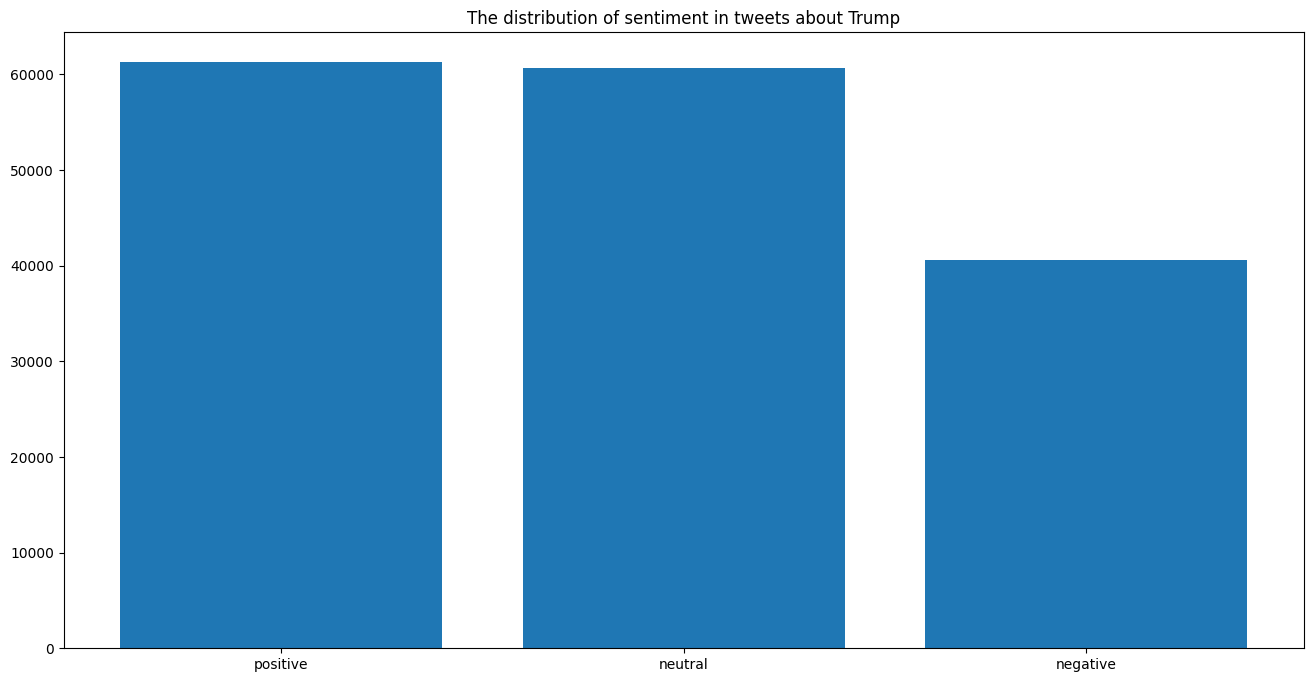

In [33]:
target_trump = Counter(tweets_trump_blob.analysis)

plt.figure(figsize=(16,8))
plt.bar(target_trump.keys(), target_trump.values())
plt.title("The distribution of sentiment in tweets about Trump")
